In [1]:
import numpy as np
from matplotlib import pyplot as plt

from StochasticProcess import StochasticProcess
from OUProcess import OUProcess
from CIRProcess import CIRProcess
from HWProcess import HWProcess
from CKLSProcess import CKLSProcess
from BSMProcess import BSMProcess

In [2]:
theta, mu, nu = 10, 2, 1
params = [theta, mu, nu]

T, Nx, Nt = 1, 100, 300

dwt = np.random.normal(0, 1, size = (Nt, Nx)) * np.sqrt(T/Nt)
process = CIRProcess(params, T, Nx, Nt)
process.InitState = process.StationaryState()

t, xt = process.SolutionEuler(dwt)

1. Numerical solutions of random process

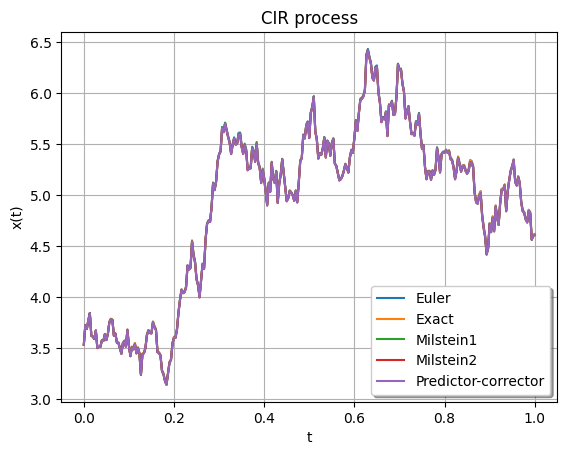

In [3]:
theta, mu, nu = 10, 2, 1
params = [theta, mu, nu]

T, Nx, Nt = 1, 1, 300

dwt = np.random.normal(0, 1, size = (Nt, Nx)) * np.sqrt(T/Nt)


process = CIRProcess(params, T, Nx, Nt)
process.InitState = process.StationaryState()

t, xt = process.SolutionEuler(dwt)
plt.plot(t, xt, label = 'Euler')

t, xt = process.SolutionExact(dwt)
plt.plot(t, xt, label = 'Exact')

t, xt = process.SolutionMilstein1(dwt)
plt.plot(t, xt, label = 'Milstein1')

t, xt = process.SolutionMilstein2(dwt)
plt.plot(t, xt, label = 'Milstein2')

t, xt = process.SolutionPredictorCorrector(dwt, 1/2, 1/2)
plt.plot(t, xt, label = 'Predictor-corrector')

plt.title("CIR process")
plt.legend(loc = 'best', fancybox = True, shadow = True) 
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

2. Sampling trajectories using transition density

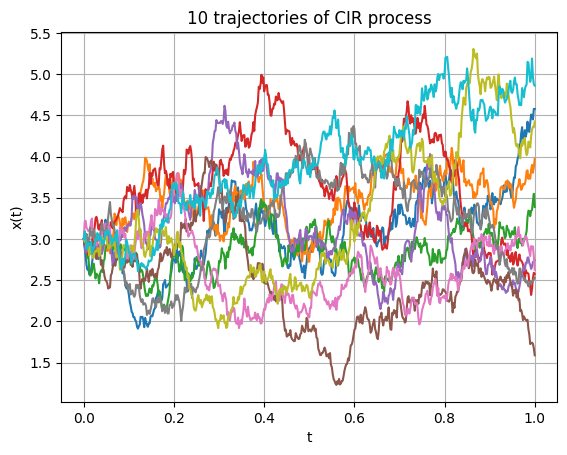

In [4]:
T, Nx, Nt = 1, 10, 500
params = np.array([6, 2, 1])

process = CIRProcess(params, T, Nx, Nt)
t, xt = process.PathGenerator()

for k in range(0, Nx):
    plt.plot(t, xt[:,k])

plt.title(f"{Nx} trajectories of CIR process")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

3. Parameter estimation (when process is known)

In [5]:
params = [0.3, 2, 1, 1]

T, Nx, Nt = 1, 50, 500

process = CKLSProcess(params, T, Nx, Nt)
t, xt = process.SolutionEuler()

min_result = process.EstimationEuler(t, xt)
min_result.x

array([0.34312785, 1.84163496, 0.99892534, 0.99662124])

4. Non parametric estimation of random process parameters (when process is unknown)

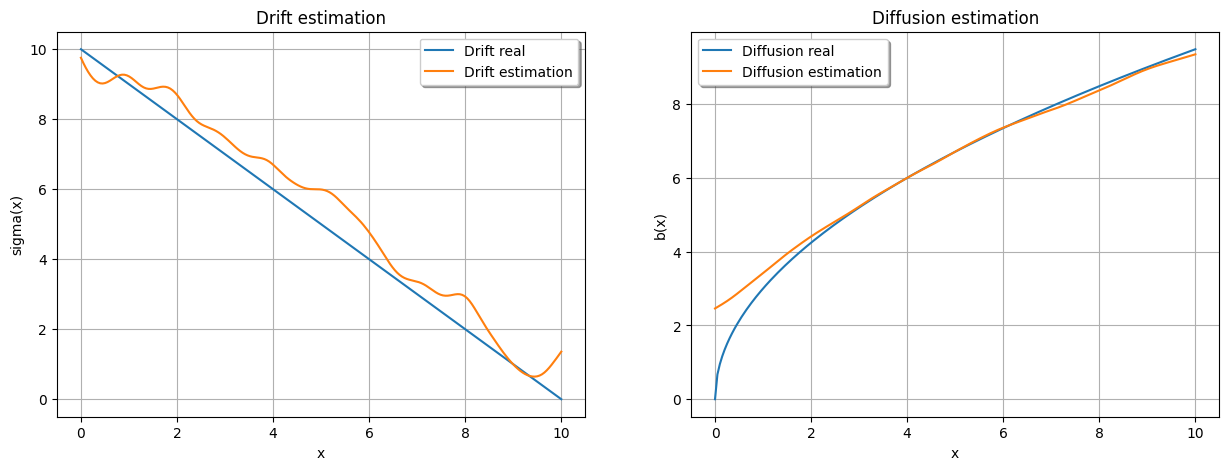

In [6]:
x = np.linspace(0, 10, 200)
params = np.array([10, 1, 3])

T, Nx, Nt = 1000, 1, 100000
process = CIRProcess(params, T, Nx, Nt)
process.InitState = process.StationaryState()
t, xt = process.SolutionExact()

b = process.bxt(x, 0, process.params)
sigma = process.sigmaxt(x, 0, process.params)

driftke = process.DriftKernelEstimator(x, xt.flatten(), T/Nt)
diffke = process.DiffusionKernelEstimator(x, xt.flatten(), T/Nt)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x, b, label = 'Drift real')
axs[1].plot(x, sigma, label = 'Diffusion real')

axs[0].plot(x, driftke, label = 'Drift estimation')
axs[1].plot(x, np.sqrt(diffke), label = 'Diffusion estimation')

axs[0].set_title("Drift estimation")
axs[1].set_title("Diffusion estimation")

axs[0].legend(loc = 'best', fancybox = True, shadow = True) 
axs[1].legend(loc = 'best', fancybox = True, shadow = True) 

axs[0].set_xlabel("x")
axs[0].set_ylabel("sigma(x)")

axs[1].set_xlabel("x")
axs[1].set_ylabel("b(x)")

axs[0].grid(True)
axs[1].grid(True)

5. Estimation of stationary density using non parametric method

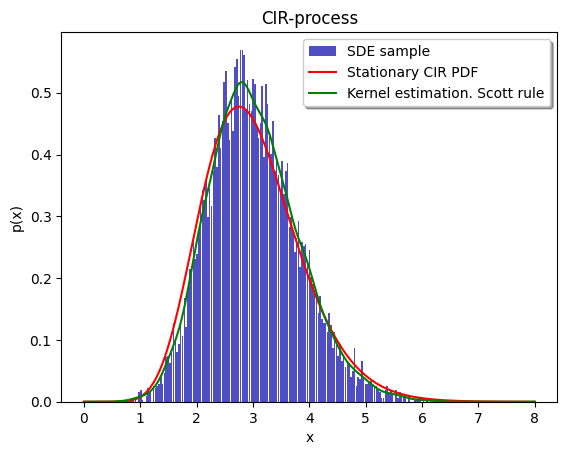

In [18]:
T, Nx, Nt = 1000, 1, 10000
params = np.array([6, 2, 1])

process = CIRProcess(params, T, Nx, Nt)
process.InitState = process.StationaryState()
t, xt = process.SolutionExact()
# t, xt = process.PathGenerator()

n = np.random.randint(0, Nt)
fig, ax = plt.subplots()
x = np.linspace(0, 8, 250)

i = np.random.randint(0, Nt)
y = xt.flatten()


n, bins, patches = ax.hist(y, bins=x, density=True, color='#0504aa', alpha=0.7, rwidth=0.85, label = 'SDE sample')

ax.set_title(f'CIR-process', loc = 'center')

ax.plot(x, process.StationaryDensity(x), label = 'Stationary CIR PDF', color = 'red')
ax.plot(x, process.StationaryDensityKernelEstimator(x, y), label = f'Kernel estimation. Scott rule', color = 'green')

ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.legend(loc = 'upper right', fancybox = True, shadow = True)